In this we are going to see Linear model, Gradient descent(optimisation function), Relu(activation function), Neural Net, Deep Learning from scartch.


In machine learning, we train a data and use it to predict the new data. We do various optimisations to make the new predictions most correct.

Let's start small, take a point (x, y) as input. Our goal is to predict y with only using x.

In [100]:
x_input = 1
y_input = 1

Let's write a function to print x,y value using plt.

matplotlib is very useful lib to plot data.

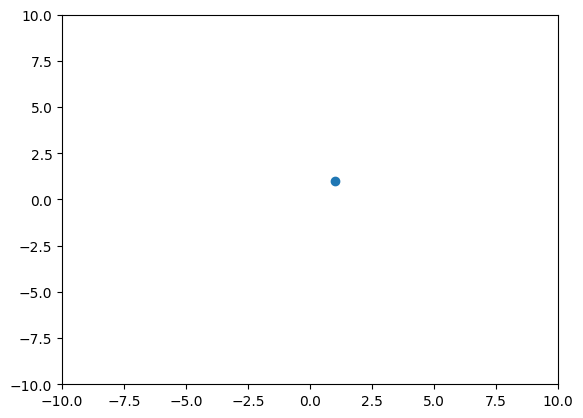

In [101]:
import matplotlib.pyplot as plt

def plot_data(x_input, y_input, type="scatter"):
	plt.xlim(-10, 10)
	plt.ylim(-10, 10)
	if type == "scatter":
		plt.scatter(x_input, y_input)


plot_data(x_input, y_input)

Now we need to predict the dot with only x_input value.

To find y from x we use slope formula: y=mx+c

we can leverage this equation to find our y_input we call it as linear function

Here, we convert the coefficient and constant to our terms

m = weight

c = bias

x = x_input

In machine learning we call weight and bias as parameters.

In [102]:
def linear(weight, input, bias):
	return weight * input + bias

Now Let's try with random weight and bias to find y_input

In [103]:
weight = 2
bias = 2

predicted = linear(weight, x_input, bias)
predicted

4

We know is wrong, Let's plot that in the graph and see what can we do

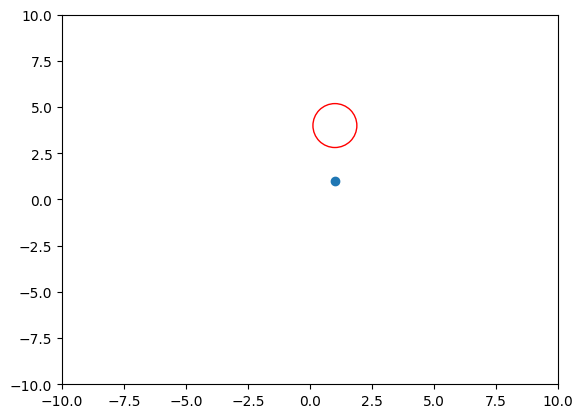

In [104]:
def plot_predicted(x_input, predicted):
	plot_data(x_input, y_input)
	plt.scatter(x_input, predicted, edgecolors='red', facecolors='none', s=1000)

plot_predicted(x_input, predicted)

Okay, we didn't predicted y value correctly. But of course we can do multiple iteration to predict it eventually.

For that we need to reduce the weight and bias. Lets start reducing those by small factor like 0.1, 0.01,..

We call it as learning_rate.

Why small, image if w = 1 and learning_rate = 2, it goes beyond the point in the first iteration. That's why we start with small.

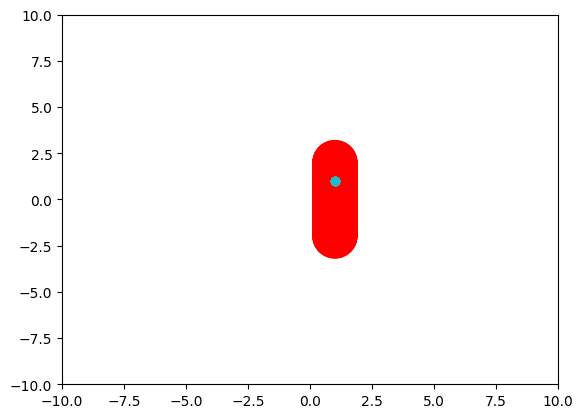

In [105]:
weight = 1
bias = 1
learning_rate = 0.01
for i in range(200):
	predicted = linear(weight, x_input, bias)
	plot_predicted(x_input, predicted)
	weight -= learning_rate
	bias -= learning_rate


uh oh, we are in dip. What do we do now!!

That's not good.

One way we can achieve this by finding the gap between y_input and predicted, the smaller the gap is better right!

To do that we can calculate the distance by subtracting like below, it doesn't matter which way we need small gap. Let's check with out last predicted value

we call it a loss function

In [106]:
def cal_loss(predicted, y_input):
	return abs(predicted - y_input)

cal_loss(predicted, y_input)

2.980000000000003

Okay, its a start.

We can try with different value.

Again it's better to automate it.

Instead of directly reducing the weight and bias, we will take small factor from loss and reduce the weight and bias. This way when loss nears zero our parameter won't decrease furthur.

we can do by using learning_rate : loss * learning_rate

We move those to loop and train method

In [107]:
def train(weight, bias, learning_rate):
	for _ in range(200):
		predicted = linear(weight, x_input, bias)
		plot_predicted(x_input, predicted)
		loss = cal_loss(predicted, y_input)
		weight -= loss * learning_rate
		bias -= loss * learning_rate

	return weight, bias

0.5087939733028607
0.5087939733028607


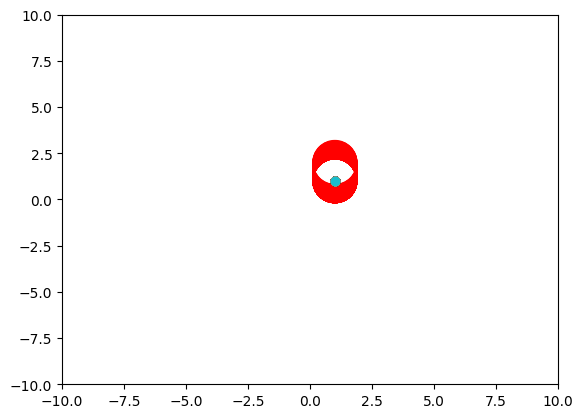

In [108]:
weight = 1
bias = 1
learning_rate = 0.01
weight, bias = train(weight, bias, learning_rate)

print(weight)
print(bias)

See, it stoped. Look at the weight and loss value it slows down as it near the actual value.

The reason is Instead of reducing tiny amount in weight and bias directly. we are taking the tiny amount of loss multiplying by 0.01 and subtracting, this way when our loss is reduce to zero we don't have anything to substract.

Now that we have our weight and bias. we can use it to predict new value, we can call it a predict function

1.526381919908582


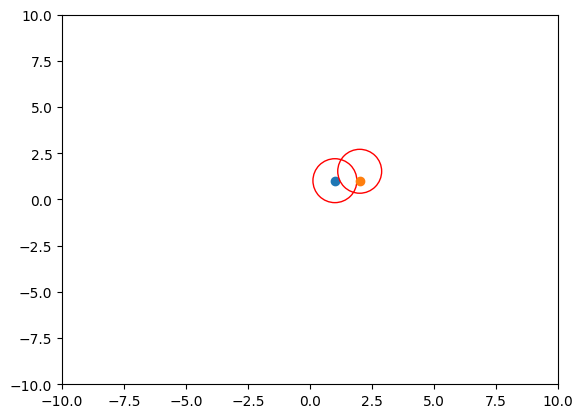

In [109]:
def predict(input):
	predicted = linear(weight, input, bias)
	print(predicted)
	plot_predicted(input, predicted)
	return 

plot_predicted(x_input, linear(weight, x_input, bias))
predict(2)

Based on our Trained weight and bias we now predict y_axis for new input.

This is called linear regression model. we train on existing input with corresponding output value and use that to find the new values.

Now Let's try with multiple data. To process multiple data efficiently we will use pytorch

In [110]:
import torch

Lets do the above same here with multiple input, Every input has output.

In machine learing, we say x/input as a feature. Each feature can have n number of same data.

we take 1 - feature(called x) with multiple values(rows)

unsqueeze - Converts row vetcor into column vector

Row represent values, column represent features.
tensor([[-5.],
        [-4.],
        [-3.],
        [-2.],
        [-1.],
        [ 1.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.]])


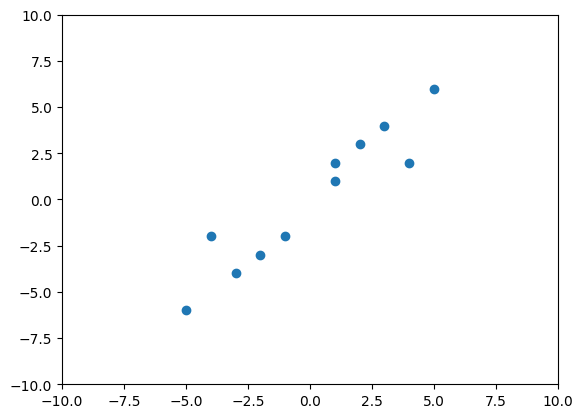

In [111]:
x_input = torch.tensor([-5, -4, -3, -2, -1, 1, 1, 2, 3, 4, 5], dtype=torch.float).unsqueeze(1)
y_input = torch.tensor([-6, -2, -4, -3, -2, 1, 2, 3, 4, 2, 6], dtype=torch.float).unsqueeze(1)

print("Row represent values, column represent features.")
print(x_input)

plot_data(x_input, y_input)

Let's create a weight and bias.

weight * x_input + bias

We need weight for every feature(i:e 1 weight) and only one bias for the whole features.

why only one bias for whole feature?

	Bias is generally used to fit the new data even if the new value returns zero with weight calculation so that furthur calculation won't stay in zero. we add bias to make it fit the model

In [112]:
feature_size = x_input.shape[1]
weight = torch.rand(feature_size)
bias = torch.rand(feature_size)
learning_rate = 0.01
print(weight)
print(bias)

tensor([0.2725])
tensor([0.2501])


Now, we need to do some changes to the loss function.

Previously we used abs to find the loss called MAE(Mean Absolute Error).

In machine learning we use MSE(Mean Squares Error) in loss function most of the time.

MSE helps us detect input data points that deviate significantly from the rest. like an odd one out

By squaring the errors, it penalizes larger errors more than smaller ones, so that the model pays more attention to these odd one out called outliers.

The mean here is to find optimial distance between whole point. so that we can have our prediction very diversed.

In [113]:
def cal_loss(pred, actual):
	return ((pred - actual)**2).mean()

In [114]:
yp = linear(weight, x_input, bias)
loss = cal_loss(yp, y_input)
loss

tensor(7.6189)

Instead of circle we can now draw a line, as we have multiple sample data we need to find the optimal weight and bias

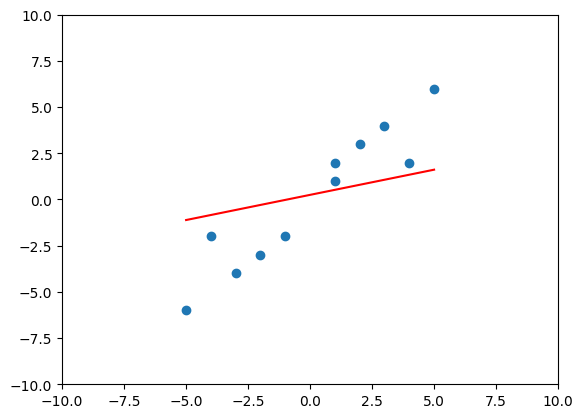

In [115]:
def plot_predicted(x_input, predicted):
	plot_data(x_input, y_input)
	plt.plot(x_input, predicted, color = "red")

plot_predicted(x_input, yp)

Now we need to reduce the weight and bias using learing rate.

Here we are going to use a optimisation called Gradient Descent - A mathematical function to reduce the loss value

pytorch provide a way to do that:

What it does?

It calculate Mead Square Error we just saw above. But it doesn't stop there.

Initially we did:
	weight -= loss * learning_rate;

	its okay for 1 value. Now we need to find how loss changes with respective weight and bias changes so that we can find better slope for each specific point called tangent which is in derivatives.

so if we take derivatives we get:

2 * sum(((linear function->predicted value) - y_input)* x_input)/len(x_input) we call it weight_slope

sum((linear function->predicted value) - y_input)/len(x_input) we call it bias_slope

so it goes like:
weight -= dw(loss) * learning_rate
bias -= db(loss) * learning_rate

If you want to learn about Derivatives checkout this videos -> https://www.youtube.com/playlist?list=PL3j1ntBPCU_om5O1RBi5-vDRwVTvDwyeV

Gradient descent visualised explanation -> https://x.com/jebineinstein/status/1896812953321766964

Below is how set the function to enable

In [116]:
weight.requires_grad_()
bias.requires_grad_()
print(weight)
print(bias)

tensor([0.2725], requires_grad=True)
tensor([0.2501], requires_grad=True)


requires_grad=True -> tell that gradient descent calcuation has been enabled.

Now let take a loss

In [117]:
yp = linear(weight, x_input, bias)
loss = cal_loss(yp, y_input)
loss

tensor(7.6189, grad_fn=<MeanBackward0>)

Call backward to calculate gradient descent

For visual understanding check this: https://x.com/jebineinstein/status/1902348538547241458

In [118]:
loss.backward()

And this is the loss value

In [119]:
print(weight.grad)
print(bias.grad)

tensor([-15.7285])
tensor([0.3678])


Let's plot to see if there is any changes

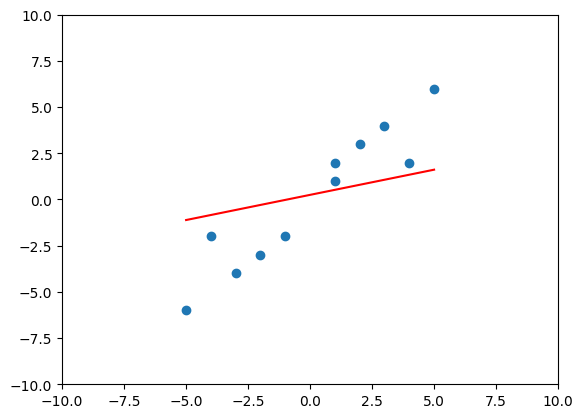

In [120]:
with torch.no_grad():
	plot_predicted(x_input , yp)

we did gradient descent using= pytorch backward function that will calculate the derivaties.

Now, we need to get new weight and bias

weight -= dw(loss) * learning_rate

bias -= db(loss) * learning_rate

Here we need to use with torch.no_grad(), telling PyTorch not to track gradients for this block of code, as we are manually updating weights and bias.

.grad.zero_() is to reset the gradient between iteration:
	After each iteration, gradients accumulate by default, so calling .zero_() prevents old gradients from affecting the next update.

In [121]:
with torch.no_grad():
	weight -= learning_rate * weight.grad
	bias -= learning_rate * bias.grad
	weight.grad.zero_()
	bias.grad.zero_()
	print(weight)
	print(bias)

tensor([0.4297], requires_grad=True)
tensor([0.2464], requires_grad=True)


Combining all those code. all code to a function called train

In [122]:
def train(iter, weight, bias, learning_rate):
	for i in range(iter):
		yp = linear(weight, x_input, bias)
		loss = cal_loss(yp, y_input)
		loss.backward()

		with torch.no_grad():
			weight -= learning_rate * weight.grad
			bias -= learning_rate * bias.grad
			weight.grad.zero_()
			bias.grad.zero_()

			if i == iter - 1:
				plot_predicted(x_input, yp)

	return weight, bias

we all set let's do the training

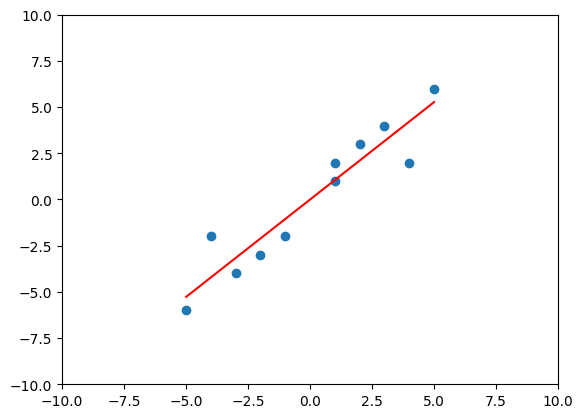

In [123]:
# Train the model
weight, bias = train(iter=200, weight=weight, bias=bias, learning_rate=learning_rate)


Tada we did linear regression model with Gradient descent in pytorch.

Now let's try to make it non linear, Using ReLU activation function.

In [124]:
import torch.nn.functional as F  # Import activation functions

def linear(weight, input, bias):
    return F.relu(weight * input + bias)  # Apply ReLU


Same initialisation

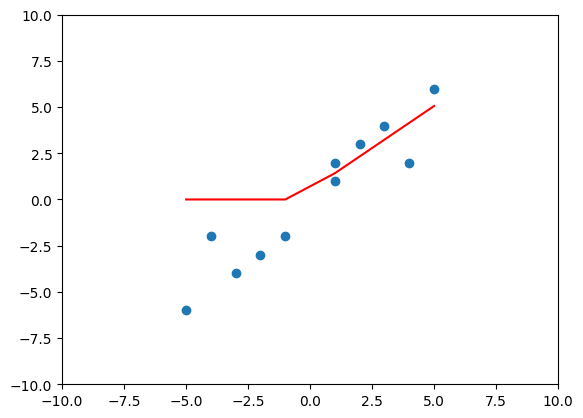

In [125]:
x_input = torch.tensor([-5, -4, -3, -2, -1, 1, 1, 2, 3, 4, 5], dtype=torch.float).unsqueeze(1)
y_input = torch.tensor([-6, -2, -4, -3, -2, 1, 2, 3, 4, 2, 6], dtype=torch.float).unsqueeze(1)

feature_size = x_input.shape[1]

weight = torch.rand(feature_size, requires_grad=True)
bias = torch.rand(feature_size, requires_grad=True)

learning_rate = 0.01

weight, bias = train(iter=200, weight=weight, bias=bias, learning_rate=learning_rate)

Okay, What just happened??

all we did was added a relu activation function.

Let's see what is relu. its a function it return 0 if prediction is negative otherwise same prediction

ReLU removes negative values, keeping only positive outputs, that mean non linear look at the above graph, there is a horizontal line preceded the slope.

That's it it draws a line??

Let's see what happen if we combine two or more non-linear.


In [126]:
import torch.nn.functional as F  # Import activation functions

def linear(weight, input, bias):
    total = 0
    for i in range(len(weight)):
        total += F.relu(weight[i] * input + bias[i])  # Apply ReLU
    return total


Here, we increased the weight for the feature so that multiple linear have different weight and bias.

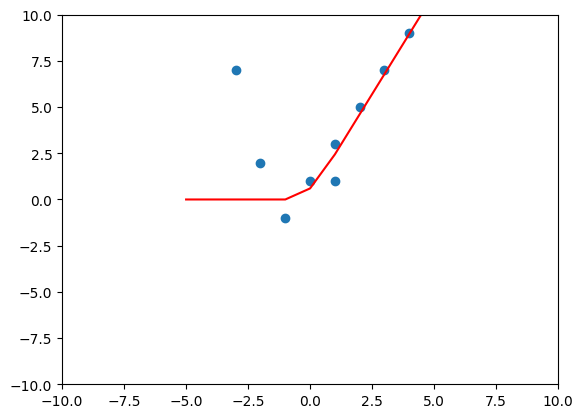

In [127]:
x_input = torch.tensor([-5, -4, -3, -2, -1, 0, 1, 1, 2, 3, 4, 5], dtype=torch.float).unsqueeze(1)
y_input = torch.tensor([23, 14, 7, 2, -1, 1, 3, 1, 5, 7, 9, 11], dtype=torch.float).unsqueeze(1)

feature_size = x_input.shape[1] + 2

weight = torch.rand(feature_size, requires_grad=True)
bias = torch.rand(feature_size, requires_grad=True)

learning_rate = 0.01

weight, bias = train(iter=400, weight=weight, bias=bias, learning_rate=learning_rate)

See we got a V-shape. With non-linear and enough iteration we can form a link between each input.

Now we are ready to create neural net!!

How?

Currently our linear/non-linear regression model has input layer and output layer.

All we have to do is adding a new hidden layer with nodes called neurons. Let's do it.


We need to change the linear function

asterisk(*) is fine when we have 1 feature, we are going to add 2 neurons(which will act as 2 input features for output layer) in the hidden layer.

We will use @ notation that will multiply the matrix and add along the row for 2 or more features.

For visual understanding check this: https://x.com/jebineinstein/status/1904083722988818713


In [128]:
import torch.nn.functional as F

def linear(weight, input, bias):
    return F.relu(weight @ input + bias)


In [129]:
x_input = torch.tensor([-5, -4, -3, -2, -1, 1, 1, 2, 3, 4, 5], dtype=torch.float).unsqueeze(1)
y_input = torch.tensor([-6, -2, -4, -3, -2, 1, 2, 3, 4, 2, 6], dtype=torch.float).unsqueeze(1)

feature_size = x_input.shape[1]
feature_size

1

We need to define a layers.

Let's say:
input layer - we have 11 input for 1 feature
1 hidden with 2 neurons
output layer with 11 output for 1 feature

In [130]:
hidden = [2]
# Define layers: 1 input → 2 hidden neurons → 1 output
sizes = [feature_size] + hidden + [1]
sizes

[1, 2, 1]

Last layer is output layer we don't need to apply linear regession

In [131]:

n = len(sizes)
neural_net = n-1
neural_net

2

Same old x_input and y_input.

Let see how we have defined out weight and bias.

sizes = [1, 2, 1]

For weight: 1x2 and 2x1 matrix

Because for weight X x_input, we need to satisfy NxM . MxP matirx multiplication and it goes for every layer

For bias: is just a constant

In [132]:
x_input = torch.tensor([-5, -4, -3, -2, -1, 1, 1, 2, 3, 4, 5], dtype=torch.float).unsqueeze(1)
y_input = torch.tensor([-6, -2, -4, -3, -2, 1, 2, 3, 4, 2, 6], dtype=torch.float).unsqueeze(1)

feature_size = x_input.shape[1]

weight = [torch.rand(sizes[i], sizes[i+1]) for i in range(neural_net)]
bias = [(torch.rand(1)[0]-0.5)*0.1 for i in range(neural_net)]

for l in weight+bias: l.requires_grad_()

learning_rate = 0.01

print(x_input.shape)
for l in weight:
	print(l.shape)


torch.Size([11, 1])
torch.Size([1, 2])
torch.Size([2, 1])


We need to split the train method to multi_linear and gradient descent calculation

multi_linear is to apply linear/predict function to each layer.

gradient descent is same.

In [133]:
def multi_linear(n_layers, weight, x_input, bias):
	output = x_input
	for i in range(n_layers):
		output = output@weight[i] + bias[i]
		output = F.relu(output)

	return output


Did You Notice "output @ weight[i]"? We Switched Here!

Why "output @ weight[i]" Instead of "weight[i] @ output" in Neural Networks?

Let see,

Each input feature has a corresponding weight, and weights should map input features to output features.

Understanding the Shapes
If:

	For input is (batch_size, input_features)

	For weight is (input_features, output_features)


What Do Neurons Expect?
	Neurons (hidden layer) expect weighted inputs from all features

	Neurons are independent of input/weights; they can be any number

	They take the same batch size but have n_neurons

Thus, the neuron layer shape is:
	(batch_size, n_neuron)

How Do We Achieve This?
	We use:
		(batch_size,input_features)@(input_features,output_features)=(batch_size,output_features)

		Where output_features is n_neuron

That’s why we use output @ weight[i] to ensure the correct shape for the next layer! This way we also satisfy the matmul rules


In [134]:
def cal_grad(n_layers, learning_rate):
	for i in range(n_layers):
		weight[i].sub_(weight[i].grad * learning_rate)
		weight[i].grad.zero_()
		bias[i].sub_(bias[i].grad * learning_rate)
		bias[i].grad.zero_()

Above for calcuating gradient descent.
	
We did some modifications to our train method to include multi_linear

In [135]:
def train(iter, weight, bias, learning_rate):
	yp = None
	for i in range(iter):
		yp = multi_linear(neural_net, weight, x_input, bias)
		loss = cal_loss(yp, y_input)
		loss.backward()
		with torch.no_grad():
			cal_grad(neural_net, learning_rate)

			if i == iter - 1:
				print(yp)
				plot_predicted(x_input, yp)

	return weight, bias

tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [1.4234],
        [1.4234],
        [2.3337],
        [3.2441],
        [4.1544],
        [5.0648]], grad_fn=<ReluBackward0>)


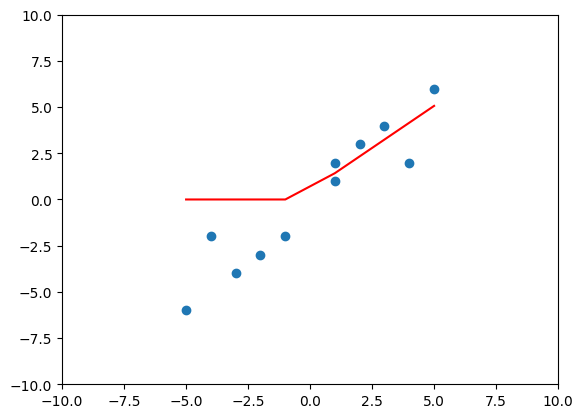

In [136]:
weight, bias = train(iter=100, weight=weight, bias=bias, learning_rate=learning_rate)

Tada out neural net is ready.

Now let's create DeepLearning!!

If it has more than one hidden layers then its a Deep learning model.

Same Initialisation

In [137]:
hidden = [2, 2]

sizes = [feature_size] + hidden + [1]
sizes

n = len(sizes)
neural_net = n-1
neural_net

x_input = torch.tensor([-10, -8, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 8, 10], dtype=torch.float).unsqueeze(1)
y_input = torch.tensor([-12, -7, -5, -6, -2, -4, -3, -2, 0, 1, 3, 4, 2, 6, 7, 9, 11], dtype=torch.float).unsqueeze(1)

feature_size = x_input.shape[1]

weight = [torch.rand(sizes[i], sizes[i+1]) for i in range(neural_net)]
bias = [(torch.rand(1)[0]-0.5)*0.1 for i in range(neural_net)]

for l in weight+bias: l.requires_grad_()

learning_rate = 0.01

tensor([[ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0115],
        [ 1.1117],
        [ 2.2119],
        [ 3.3121],
        [ 4.4123],
        [ 5.5125],
        [ 6.6127],
        [ 8.8130],
        [11.0134]], grad_fn=<ReluBackward0>)


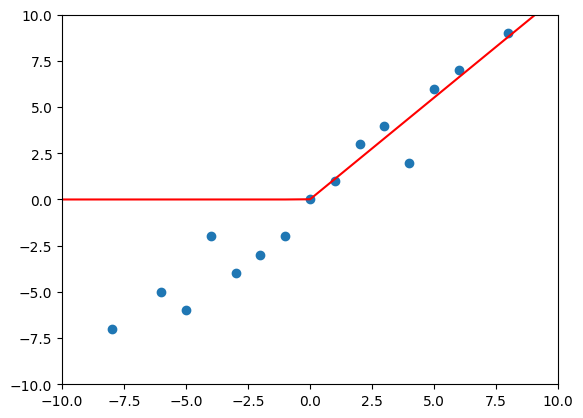

In [138]:
weight, bias = train(iter=100, weight=weight, bias=bias, learning_rate=learning_rate)

The more Layer, we add the more feature we can conver!!

I understand we jumped right in and built a neural network using deep learning.

I intentionally used less mathematical notation to show that you don’t need a strong math foundation to get started with machine learning.

However, having a solid understanding of math can help you progress much faster without getting stuck.

Think of it like reading a novel—knowing the meaning of every word helps you read faster, but you don’t necessarily need to know every single one to understand the story. Hope that makes sense!

Gradient descent is one area where you might face challenges, but the provided YouTube video should be enough to get you through it.

Cheers!